In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

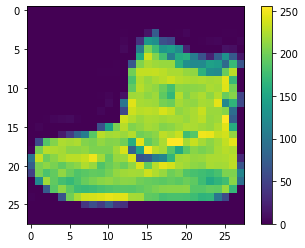

In [5]:
# 预处理
plt.figure() # 创建图像
plt.imshow(train_images[0])
plt.colorbar() # 给子图像添加颜色渐变条
plt.grid(False) # 0 = false = 不显示网格线
plt.show()

In [6]:
# 标准化
train_images = train_images / 255.0
test_images = test_images / 255.0

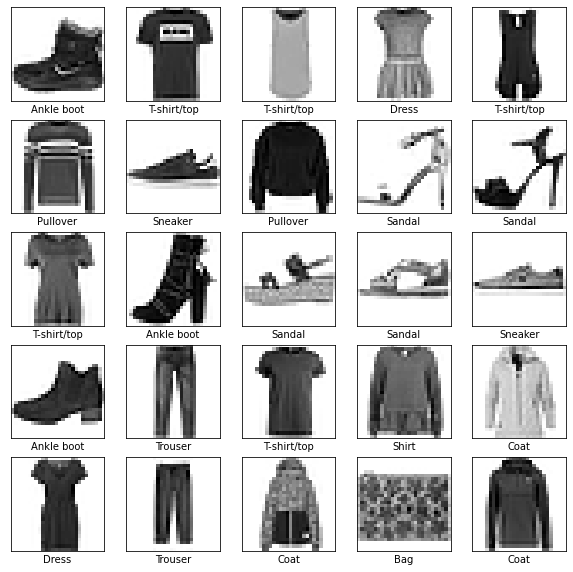

In [7]:
plt.figure(figsize=(10,10)) # 图大小
for i in range(25):
    plt.subplot(5,5,i+1) # 创建单个子图， 一个 25 个图， 为第 i + 1 个
    plt.xticks([]) # 坐标轴换名
    plt.yticks([]) # 同上
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # 128 输出空间维度 激活函数实现稀疏
    keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam', # 优化器 决定模型如何根据其看到的数据和自身的损失函数进行更新
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 损失函数 用于将模型引导到正确的方向
                metrics=['accuracy']) # 指标 用于监控训练和测试步骤

In [10]:
# 开练
model.fit(train_images, train_labels, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5397 - accuracy: 0.8138
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8586
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3592 - accuracy: 0.8712
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3373 - accuracy: 0.8780
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3139 - accuracy: 0.8858
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2993 - accuracy: 0.8899
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2860 - accuracy: 0.8954
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.8983
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.9033
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.9057

In [11]:
model.evaluate(test_images, test_labels, verbose=2) # verbose 如何展示结果

313/313 - 0s - loss: 0.3315 - accuracy: 0.8842


[0.3315131962299347, 0.8841999769210815]

In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) # 再模型最后添加一层 softmax 表示概率

In [13]:
# 预测
predictions = probability_model.predict(test_images)

In [14]:
predictions[0]

array([5.2588473e-07, 3.0222727e-09, 9.7993052e-08, 4.0825071e-07,
       6.8470356e-08, 9.7911421e-04, 2.9743771e-06, 1.1744286e-02,
       6.7821197e-06, 9.8726571e-01], dtype=float32)

In [15]:
# 查看最大值
np.argmax(predictions[0])

9

In [16]:
# 查看是否正确
test_labels[0]

9

In [17]:
# 绘制图表
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'pink' if predicted_label == true_label else 'green'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [18]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('pink') # 预测的结果 若存在 pink 则预测出错
    thisplot[true_label].set_color('green')

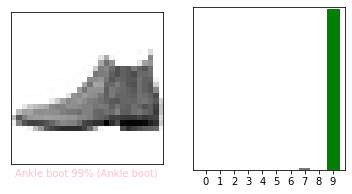

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

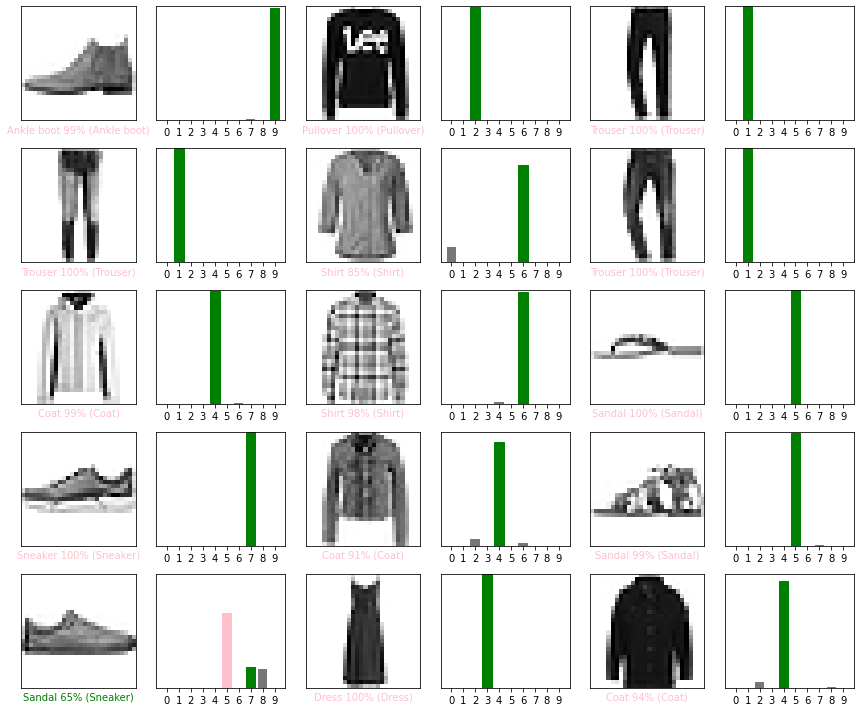

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()